# **Import** **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# **Data Preparation**

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
print(df.shape)

(7043, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terdapat 20 atribut yang ada pada dataset tersebut.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dapat dilihat pada hasil dari pengecekan data yang kosong, tidak didapati adanya kekosongan yang ada pada dataset. Hal ini dapat dikatakan bahwa data tersebut bersih dan dapat dilanjut pada pengecekan duplicated values pada data.

In [ ]:
bool_series = df["customerID"].duplicated()

In [ ]:
bool_series.head()

0    False
1    False
2    False
3    False
4    False
Name: customerID, dtype: bool

In [ ]:
df[bool_series]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df.duplicated().sum()

0

Tidak terdapat Data Duplikat pada dataset PT. Telco

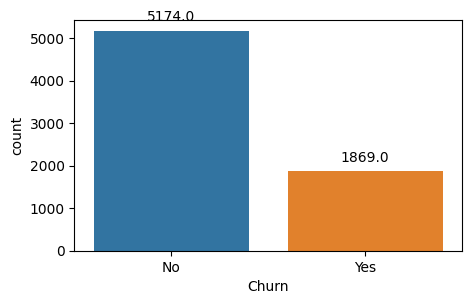

In [ ]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Churn', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

Pengguna yang mengalami churn pada dataset PT. Telco sebanyak 1869, sedangkan yang tidak mengalami churn sebanyak 5174.

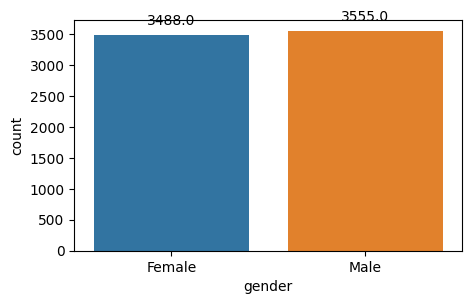

In [ ]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='gender', data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

Distribusi gender pengguna layanan PT. Telco dapat dilihat pada diagram di atas memiliki 3555 Pria dan 3488 Wanita.

<Axes: ylabel='Churn'>

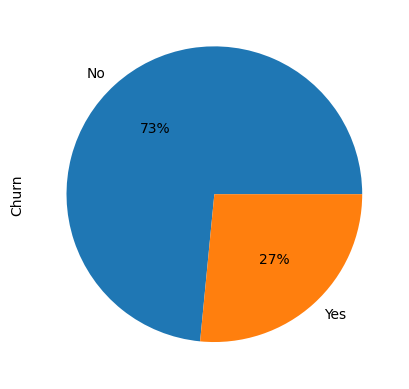

In [ ]:
df["Churn"].value_counts().plot(kind="pie",autopct='%1.0f%%')

Diagram Pie yang menyatakan presentasi pelanggan yang Churn pada PT. Telco dengan 27% Churn dan 73% tidak Churn

In [ ]:
columns_to_encode = ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','TotalCharges',"Churn"]
# Apply label encoding to selected columns
ldata = df.copy()
label_encoder = LabelEncoder()

for column in columns_to_encode:
    ldata[column] = label_encoder.fit_transform(df[column])

Mengubah atribut kategorikal menjadi dinyatakan dalam numerik.

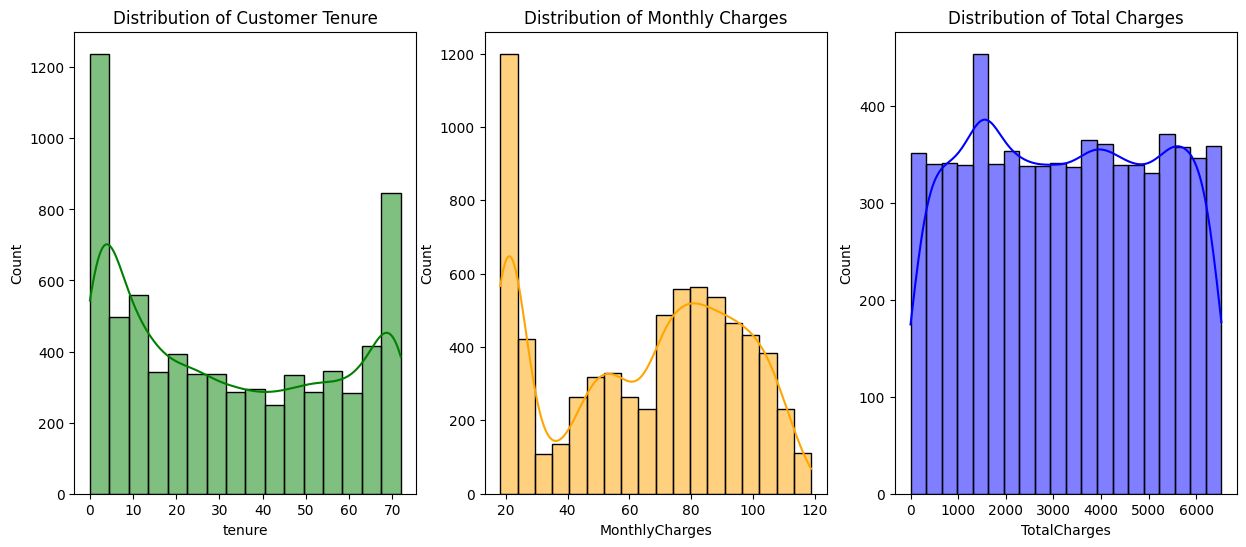

In [ ]:
plt.figure(figsize=(15, 6))

# Creating a 1x2 subplot structure
plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], kde=True, color='green')
plt.title('Distribution of Customer Tenure')

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='orange')
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3)
sns.histplot(ldata['TotalCharges'], kde=True, color='blue')
plt.title('Distribution of Total Charges')

#plt.tight_layout()
plt.show()

Diagram menunjukan grafik distribusi dari data numerik pada atribut informasi akun pelanggan

In [ ]:
idata = ldata.drop(['customerID'], axis=1)

Mengeluarkan atribut customerID karena atribut tersebut adalah ID, bukan atribut numerik atau kategorikal

<ipython-input-44-e7e5894173a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ldata.corr(),cmap = ["skyblue","orange"],annot = True);


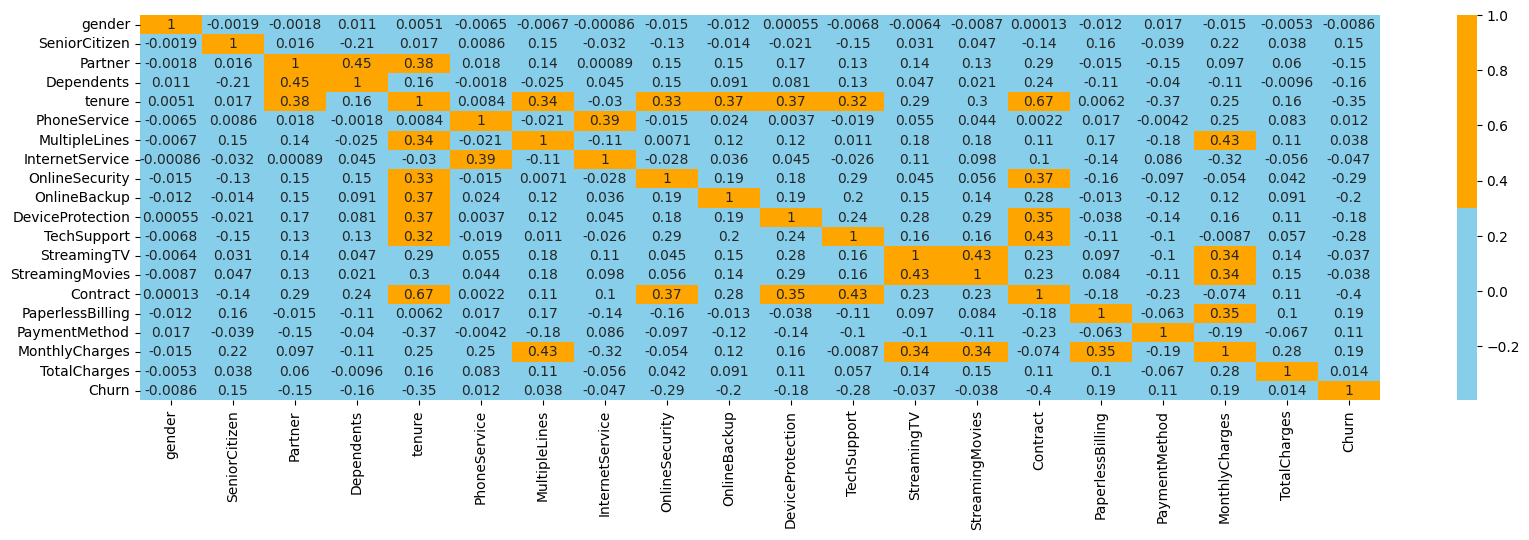

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(ldata.corr(),cmap = ["skyblue","orange"],annot = True);

Membuat heatmap diagram untuk menentukan keterkaitan yang ada di antara atribut

# **Data Modelling**

In [ ]:
idata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
x = idata.iloc[:,:19]
y = idata.iloc[:,19]

Fungsi di atas digunakan untuk menentukan atribut yang tergolong pada variabel x, dan variabel y

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE()
print("before",Counter(y))
x_smt,y_smt = smt.fit_resample(x,y)
print("after",Counter(y_smt))

before Counter({0: 5174, 1: 1869})
after Counter({0: 5174, 1: 5174})


Melakukan Over Sampling dari data yang ada

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size = 0.20, random_state = 39)

Membagi dataset menjadi 80% training dan 20% testing disertai dengan random state 39

In [ ]:
print('x_train length: ', len(x_train), '\nx_test length: ', len(x_test), '\ny_train length: ', len(y_train), '\ny_test length: ', len(y_test))

x_train length:  8278 
x_test length:  2070 
y_train length:  8278 
y_test length:  2070


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
pred = RF.predict(x_test)

In [ ]:
print("Akurasi :", accuracy_score(y_test, pred))
print("Presisi :", precision_score(y_test, pred, average='macro'))
print("Recall :", recall_score(y_test, pred, average='macro'))

Akurasi : 0.8415458937198068
Presisi : 0.8417336073229964
Recall : 0.8415345436622033


## **K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)


In [ ]:
print("Akurasi :", accuracy_score(y_test, knn_predictions))
print("Presisi :", precision_score(y_test, knn_predictions, average='macro'))
print("Recall :", recall_score(y_test, knn_predictions, average='macro'))

Akurasi : 0.7685990338164251
Presisi : 0.7687547459531555
Recall : 0.7686104866955932


## **Decision Tree**

In [ ]:
from sklearn import tree

In [ ]:
pohon = tree.DecisionTreeClassifier()
pohon.fit(x_train, y_train)
predik = pohon.predict(x_test)

In [ ]:
print("Akurasi :", accuracy_score(y_test, predik))
print("Presisi :", precision_score(y_test, predik, average='macro'))
print("Recall :", recall_score(y_test, predik, average='macro'))

Akurasi : 0.7811594202898551
Presisi : 0.7811595366408985
Recall : 0.7811587492438556


## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
prediks = gnb.fit(x_train, y_train).predict(x_test)

In [ ]:
print("Akurasi :", accuracy_score(y_test, prediks))
print("Presisi :", precision_score(y_test, prediks, average='macro'))
print("Recall :", recall_score(y_test, prediks, average='macro'))

Akurasi : 0.7874396135265701
Presisi : 0.788170525338445
Recall : 0.7874151437981225
